In [1]:
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_excel('Downloads/new dataset.xlsx')

In [3]:
df.head()

Year  Month  Day Weekend?    Hour Collision Type         Injury Type  \
0  2015      1    5  Weekday     0.0          2-Car   No injury/unknown   
1  2015      1    6  Weekday  1500.0          2-Car   No injury/unknown   
2  2015      1    6  Weekend  2300.0          2-Car  Non-incapacitating   
3  2015      1    7  Weekend   900.0          2-Car  Non-incapacitating   
4  2015      1    7  Weekend  1100.0          2-Car   No injury/unknown   

                          Primary Factor      Reported_Location   Latitude  \
0  OTHER (DRIVER) - EXPLAIN IN NARRATIVE             1ST & FESS  39.159207   
1                  FOLLOWING TOO CLOSELY          2ND & COLLEGE  39.161440   
2              DISREGARD SIGNAL/REG SIGN  BASSWOOD & BLOOMFIELD  39.149780   
3          FAILURE TO YIELD RIGHT OF WAY         GATES & JACOBS  39.165655   
4          FAILURE TO YIELD RIGHT OF WAY                  W 3RD  39.164848   

   Longitude  
0 -86.525874  
1 -86.534848  
2 -86.568890  
3 -86.575956  
4 -86.579625

### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.

In [4]:
# Identify where there is Missing data
missing_values = df.isnull().sum()
#print(missing_values[missing_values > 0].index.tolist())
print(missing_values)

Year                    0
Month                   0
Day                     0
Weekend?               68
Hour                  225
Collision Type          6
Injury Type             0
Primary Factor       1121
Reported_Location      35
Latitude               30
Longitude              30
dtype: int64


In [5]:
#Explore Object dtype columns to identify any problematic data on irrelevant attributes/features
for i in df.select_dtypes('object').columns:
    print(i, df[i].unique())

Weekend? ['Weekday' 'Weekend' nan]
Collision Type ['2-Car' '1-Car' '3+ Cars' 'Pedestrian' 'Cyclist' 'Bus' 'Moped/Motorcycle'
 nan]
Injury Type ['No injury/unknown' 'Non-incapacitating' 'Incapacitating' 'Fatal']
Primary Factor ['OTHER (DRIVER) - EXPLAIN IN NARRATIVE' 'FOLLOWING TOO CLOSELY'
 'DISREGARD SIGNAL/REG SIGN' 'FAILURE TO YIELD RIGHT OF WAY'
 'DRIVER DISTRACTED - EXPLAIN IN NARRATIVE' 'ENGINE FAILURE OR DEFECTIVE'
 'RAN OFF ROAD RIGHT' 'UNSAFE BACKING' 'ROADWAY SURFACE CONDITION' nan
 'SPEED TOO FAST FOR WEATHER CONDITIONS' 'ANIMAL/OBJECT IN ROADWAY'
 'PEDESTRIAN ACTION' 'IMPROPER TURNING' 'UNSAFE LANE MOVEMENT'
 'LEFT OF CENTER' 'IMPROPER LANE USAGE' 'OVERCORRECTING/OVERSTEERING'
 'BRAKE FAILURE OR DEFECTIVE' 'UNSAFE SPEED' 'DRIVER ASLEEP OR FATIGUED'
 'VIEW OBSTRUCTED' 'DRIVER ILLNESS' 'IMPROPER PASSING'
 'OTHER (VEHICLE) - EXPLAIN IN NARRATIVE'
 'OTHER (ENVIRONMENTAL) - EXPLAIN IN NARR' 'WRONG WAY ON ONE WAY'
 'ACCELERATOR FAILURE OR DEFECTIVE' 'INSECURE/LEAKY LOAD'
 'CELL P

In [6]:
#Explore int dtype columns to identify any problematic data on irrelevant attributes/features
for i in df.select_dtypes('float').columns:
    print(i, df[i].unique())

Hour [   0. 1500. 2300.  900. 1100. 1800. 1200. 1400. 1600. 1700. 1300.  700.
 2100. 2000. 1900.  400. 1000.  600.  800. 2200.  100.  200.  300.  500.
   nan]
Latitude [39.15920668 39.16144    39.14978027 ... 38.99232624 38.99152
 38.990848  ]
Longitude [-86.52587356 -86.534848   -86.56889006 ... -86.53725171 -86.448784
 -86.368864  ]


### Data Preparation
After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [7]:
# Location Analysis - majority of the reported locations have unique values. So, we need to explore alternative approaches for a more meaningful analysis.
df.drop(df[df.Latitude==0].index, inplace=True)
df.dropna(subset='Latitude', inplace=True)

In [8]:
# Drop duplicates
df.drop_duplicates(inplace=True)

In [9]:
#Trim the Hour values to 2 digits
df['Hour']=df.Hour//100

In [10]:
# Replace the NaN values for attributes
df.dropna(subset='Hour', inplace=True)
df.dropna(subset='Injury Type', inplace=True)

In [11]:
# Primary Factor Categorizationand clean-up
df['Primary Factor'].unique()

array(['OTHER (DRIVER) - EXPLAIN IN NARRATIVE', 'FOLLOWING TOO CLOSELY',
       'DISREGARD SIGNAL/REG SIGN', 'FAILURE TO YIELD RIGHT OF WAY',
       'DRIVER DISTRACTED - EXPLAIN IN NARRATIVE',
       'ENGINE FAILURE OR DEFECTIVE', 'RAN OFF ROAD RIGHT',
       'UNSAFE BACKING', 'ROADWAY SURFACE CONDITION', nan,
       'SPEED TOO FAST FOR WEATHER CONDITIONS',
       'ANIMAL/OBJECT IN ROADWAY', 'PEDESTRIAN ACTION',
       'IMPROPER TURNING', 'UNSAFE LANE MOVEMENT', 'LEFT OF CENTER',
       'IMPROPER LANE USAGE', 'OVERCORRECTING/OVERSTEERING',
       'BRAKE FAILURE OR DEFECTIVE', 'UNSAFE SPEED',
       'DRIVER ASLEEP OR FATIGUED', 'VIEW OBSTRUCTED', 'DRIVER ILLNESS',
       'IMPROPER PASSING', 'OTHER (VEHICLE) - EXPLAIN IN NARRATIVE',
       'OTHER (ENVIRONMENTAL) - EXPLAIN IN NARR', 'WRONG WAY ON ONE WAY',
       'ACCELERATOR FAILURE OR DEFECTIVE', 'INSECURE/LEAKY LOAD',
       'CELL PHONE USAGE', 'TIRE FAILURE OR DEFECTIVE',
       'OTHER TELEMATICS IN USE', 'OTHER LIGHTS DEFECTIVE',
   

In [12]:
#Primary factor unqiue counts
primary_factor_count=df['Primary Factor'].value_counts().reset_index()
primary_factor_count =primary_factor_count.rename(columns={"index": "Primary Factor", "Primary Factor": "count"}, errors="raise")
primary_factor_count

Primary Factor  count
0              FAILURE TO YIELD RIGHT OF WAY  10281
1                      FOLLOWING TOO CLOSELY   6732
2      OTHER (DRIVER) - EXPLAIN IN NARRATIVE   5471
3                             UNSAFE BACKING   4696
4                         RAN OFF ROAD RIGHT   2638
5                  DISREGARD SIGNAL/REG SIGN   2084
6      SPEED TOO FAST FOR WEATHER CONDITIONS   1747
7                           IMPROPER TURNING   1700
8   DRIVER DISTRACTED - EXPLAIN IN NARRATIVE   1506
9                   ANIMAL/OBJECT IN ROADWAY   1464
10                              UNSAFE SPEED   1336
11                 ROADWAY SURFACE CONDITION   1099
12                            LEFT OF CENTER    940
13                       IMPROPER LANE USAGE    894
14                       ALCOHOLIC BEVERAGES    717
15                      UNSAFE LANE MOVEMENT    698
16               OVERCORRECTING/OVERSTEERING    518
17                          IMPROPER PASSING    453
18    OTHER (VEHICLE) - EXPLAIN IN NARRATIVE    419
19   OTHER (ENVIRONMENTAL) - EXPLAIN IN NARR    344
20                BRAKE FAILURE OR DEFECTIVE    323
21                         PEDESTRIAN ACTION    278
22                 DRIVER ASLEEP OR FATIGUED    238
23                            DRIVER ILLNESS    159
24                           VIEW OBSTRUCTED    147
25                          CELL PHONE USAGE    129
26                      WRONG WAY ON ONE WAY     96
27                             NONE (DRIVER)     95
28                 TIRE FAILURE OR DEFECTIVE     72
29                         RAN OFF ROAD LEFT     49
30                        PRESCRIPTION DRUGS     47
31          ACCELERATOR FAILURE OR DEFECTIVE     46
32                                     GLARE     40
33                       INSECURE/LEAKY LOAD     40
34                    OBSTRUCTION NOT MARKED     35
35                  OVERSIZE/OVERWEIGHT LOAD     26
36                     PASSENGER DISTRACTION     26
37                   OTHER TELEMATICS IN USE     26
38                          STEERING FAILURE     24
39               ENGINE FAILURE OR DEFECTIVE     24
40                             ILLEGAL DRUGS     22
41             HEADLIGHT DEFECTIVE OR NOT ON     18
42                     HOLES/RUTS IN SURFACE     13
43  TRAFFIC CONTROL INOPERATIVE/MISSING/OBSC     11
44                      NONE (ENVIRONMENTAL)     10
45                            NONE (VEHICLE)      9
46                    OTHER LIGHTS DEFECTIVE      9
47                         TOW HITCH FAILURE      7
48                   ROAD UNDER CONSTRUCTION      7
49                               JACKKNIFING      5
50                         SEVERE CROSSWINDS      3
51          VIOLATION OF LICENSE RESTRICTION      3
52                     LANE MARKING OBSCURED      2
53                              UTILITY WORK      1
54                        SHOULDER DEFECTIVE      1

In [13]:
df.dropna(subset='Primary Factor', inplace=True)

#### Data Cleaning Summary
After thorough data cleaning, our dataset is now refined. Here is a summary of the key steps we took:

Dropped Unnecessary Columns: Removed irrelevant columns to streamline the dataset.

Added a Date Column: Introduced a dedicated column to explicitly represent the date for each record.

Categorized the Primary Factor Column: Classified primary factors into distinct categories—Vehicle Factor, Human Factor, Both, and External Factors.

Dropped Unnecessary Rows: Eliminated rows lacking essential information to enhance the dataset's integrity.

*Note: The completion of these cleaning steps ensures a more focused and accurate foundation for subsequent analyses.*

### Data Visualization

In [14]:
number_of_crashes_per_hour= df.groupby('Hour').count()
number_of_crashes_per_hour['Number of Accidents']=number_of_crashes_per_hour['Year']

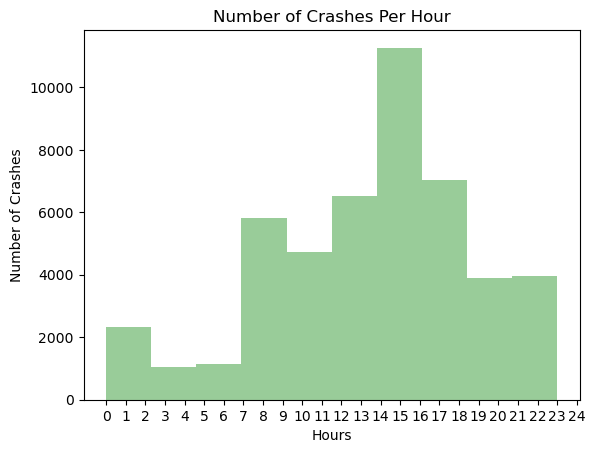

In [15]:
plt.hist(df['Hour'], alpha=0.4 ,color='g');
plt.xlabel('Hours')
plt.ylabel('Number of Crashes')
plt.title('Number of Crashes Per Hour')
x=np.arange(0,25,1)
plt.xticks(x)
plt.show()

#### Analysis of Accidents: Weekdays vs. Weekends
Ratio of Accidents during Weekdays and Weekends
In our investigation, we aim to determine if accidents are more frequent during weekends compared to weekdays. It's important to note that due to the discrepancy in the number of weekdays (5) and weekends (2), we need to compute ratio values.

*Insight: After comparing the averages, it becomes evident that the number of accidents during weekdays consistently exceeds that of weekends, suggesting potential variations in traffic patterns between the two.*

In [16]:
accidents_per_weekend=df.groupby('Weekend?').count()
accidents_per_weekend.reset_index(inplace=True)
accidents_per_weekend['Number of Accidents']=accidents_per_weekend['Year']
accidents_per_weekend

Weekend?   Year  Month    Day   Hour  Collision Type  Injury Type  \
0  Weekday  36054  36054  36054  36054           36050        36054   
1  Weekend  11724  11724  11724  11724           11724        11724   

   Primary Factor  Reported_Location  Latitude  Longitude  Number of Accidents  
0           36054              36054     36054      36054                36054  
1           11724              11724     11724      11724                11724

In [17]:
accidents_per_weekend.loc[0, 'Number of Accidents']=accidents_per_weekend.loc[0, 'Number of Accidents']/5
accidents_per_weekend.loc[1, 'Number of Accidents']=accidents_per_weekend.loc[1, 'Number of Accidents']/2

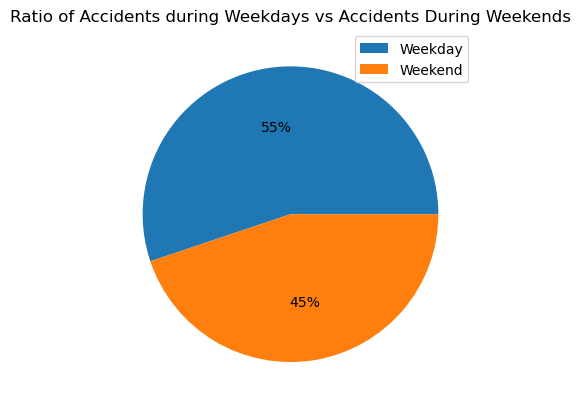

In [18]:
color=['Red', 'Blue']
plt.pie(accidents_per_weekend['Number of Accidents'], autopct='%1.0f%%')

plt.legend(['Weekday', 'Weekend'])
plt.title("Ratio of Accidents during Weekdays vs Accidents During Weekends")
plt.show()



#### Analysis of Car Accidents: Major Factors
Identification of Major Reasons for Car Accidents
Upon analysis, it becomes evident that the primary factor contributing to car accidents is often attributed to human factors, such as lack of concentration or losing control over the vehicle. Furthermore, a notable observation is that the majority of cases result in 'No Injury' accidents.

*Insight: Understanding the prevalence of human-related factors and the frequent occurrence of 'No Injury' accidents can inform targeted safety measures and interventions.*

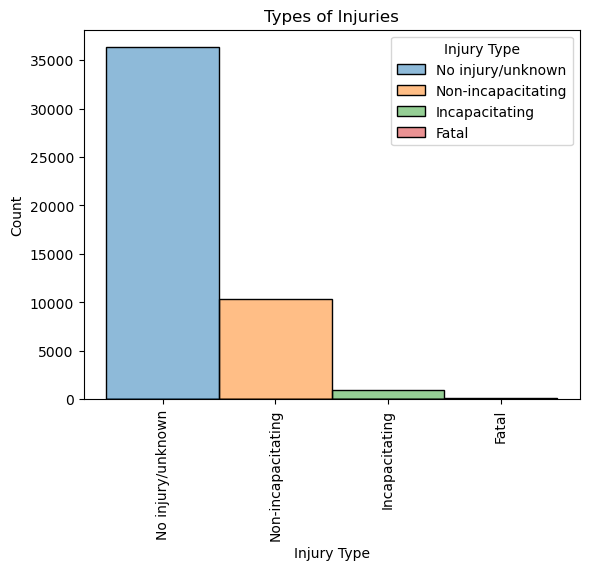

In [19]:
plot= sns.histplot(x="Injury Type",hue='Injury Type', data=df)
plot.set(title="Types of Injuries")
plot.tick_params(axis='x', rotation=90)

In [20]:
fig=px.bar(primary_factor_count,y='count',x='Primary Factor',color='count')
fig.show()

#### Analysis of Car Accidents: High-Frequency Locations
Identifying the Location with the Highest Frequency of Car Accidents
Upon examination, a recurring pattern emerges, indicating that a significant number of car accidents concentrate around a specific location (Longitude = -86, Latitude = 40). This suggests that this particular area experiences the highest frequency of accidents, implying heightened traffic activity in that part of the city.

*Insight: Recognizing the concentration of accidents at a specific location provides valuable information about areas with potentially higher traffic density, warranting further investigation into potential contributing factors.*

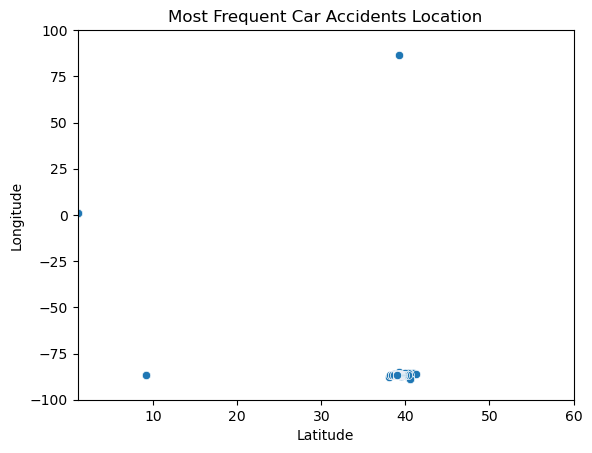

In [21]:
plot=sns.scatterplot(x=df['Latitude'], y=df['Longitude'], data=df);
plot.set(xlim=(1,60));
plot.set(ylim=(-100,100));
plot.set(title='Most Frequent Car Accidents Location' );

Text(0.5, 1.0, 'Frequency of type of Accidents')

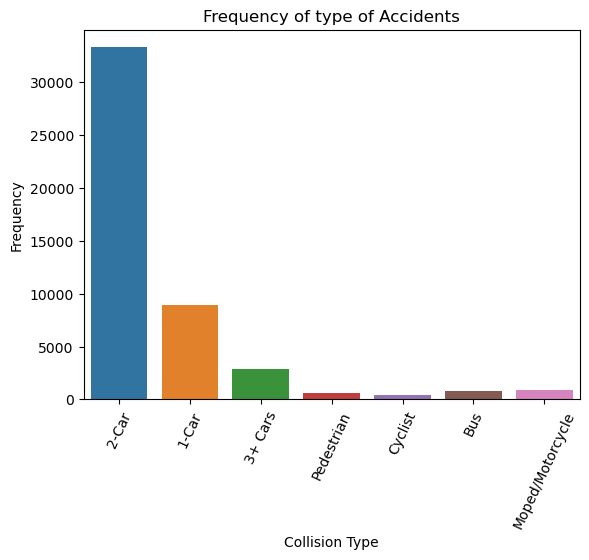

In [22]:
sb.countplot(x=df['Collision Type'])
plt.ylabel('Frequency')
plt.xticks(rotation=65)
plt.title('Frequency of type of Accidents')

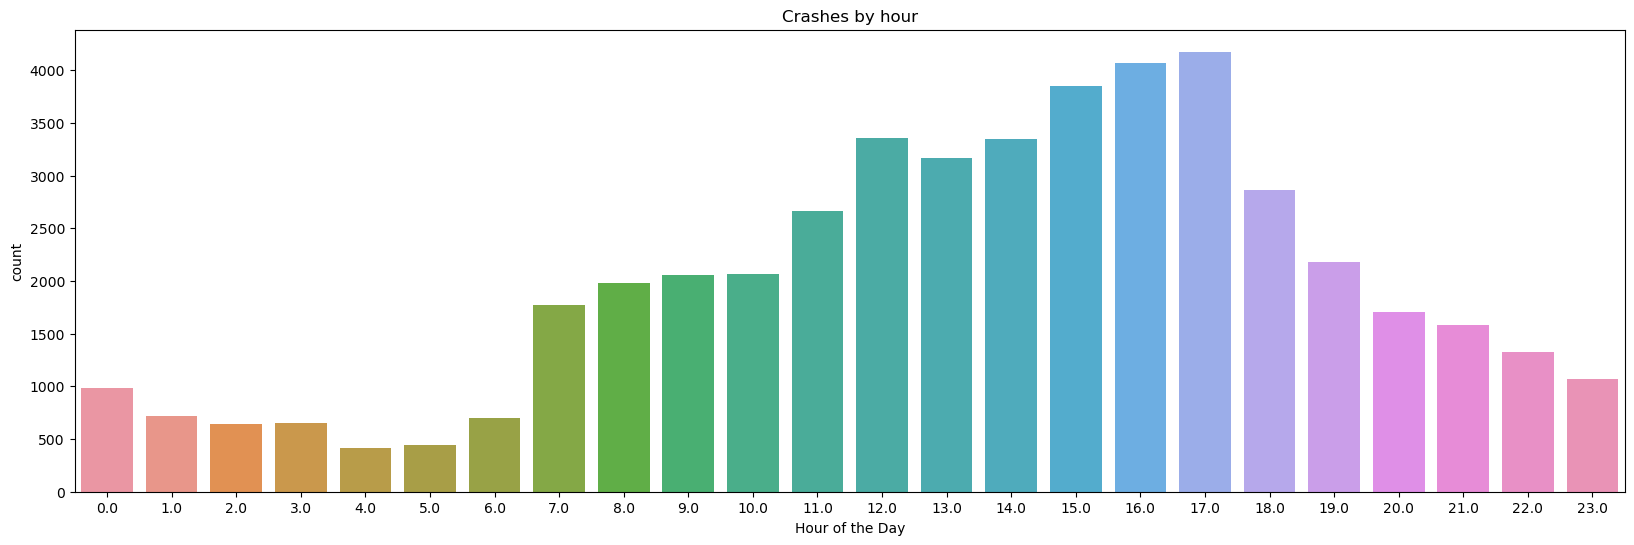

In [23]:
#time analysis

plt.figure(figsize=(20,6))
sns.countplot(x = 'Hour',data=df)
plt.title('Crashes by hour')
plt.xlabel("Hour of the Day")
plt.show()

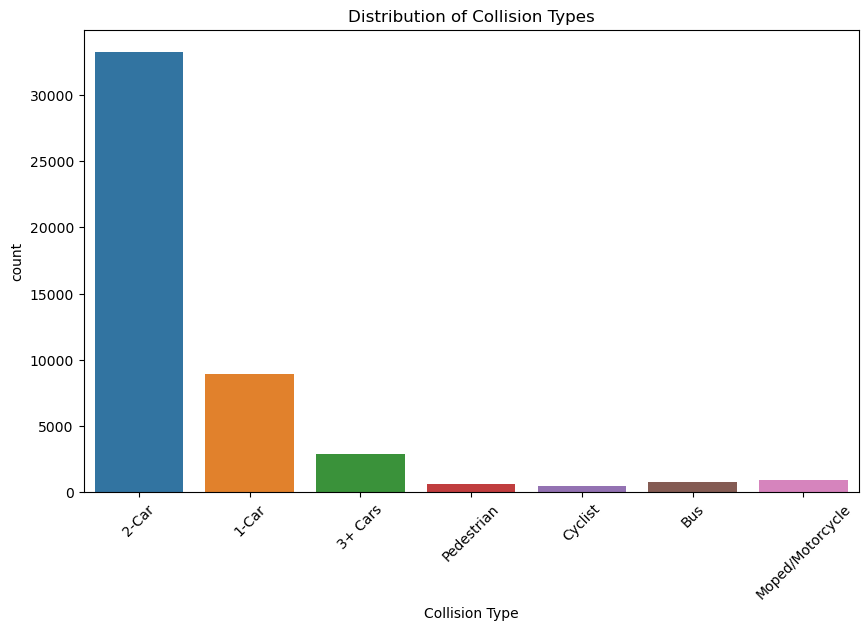

In [24]:
# Collision Type Analysis
plt.figure(figsize=(10,6))
sns.countplot(x = 'Collision Type',data= df)
plt.title('Distribution of Collision Types')
plt.xticks(rotation = 45)
plt.show()

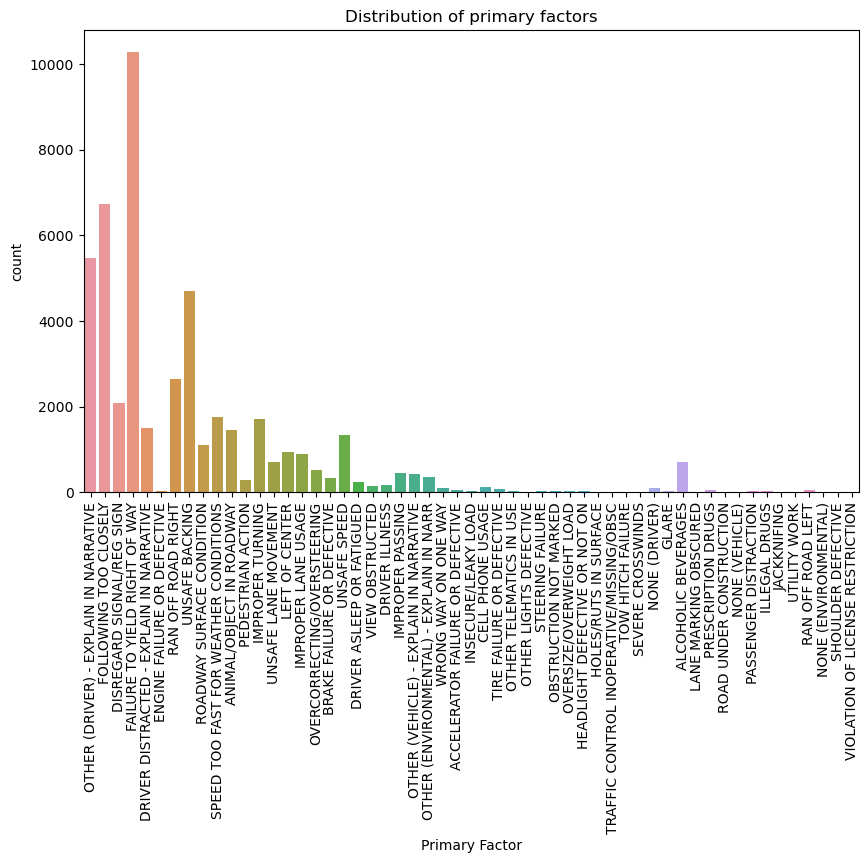

In [25]:
# Primary Factor Analysis

plt.figure(figsize=(10,6))
sns.countplot(x = "Primary Factor",data=df)
plt.title('Distribution of primary factors')
plt.xticks(rotation =90)
plt.show()

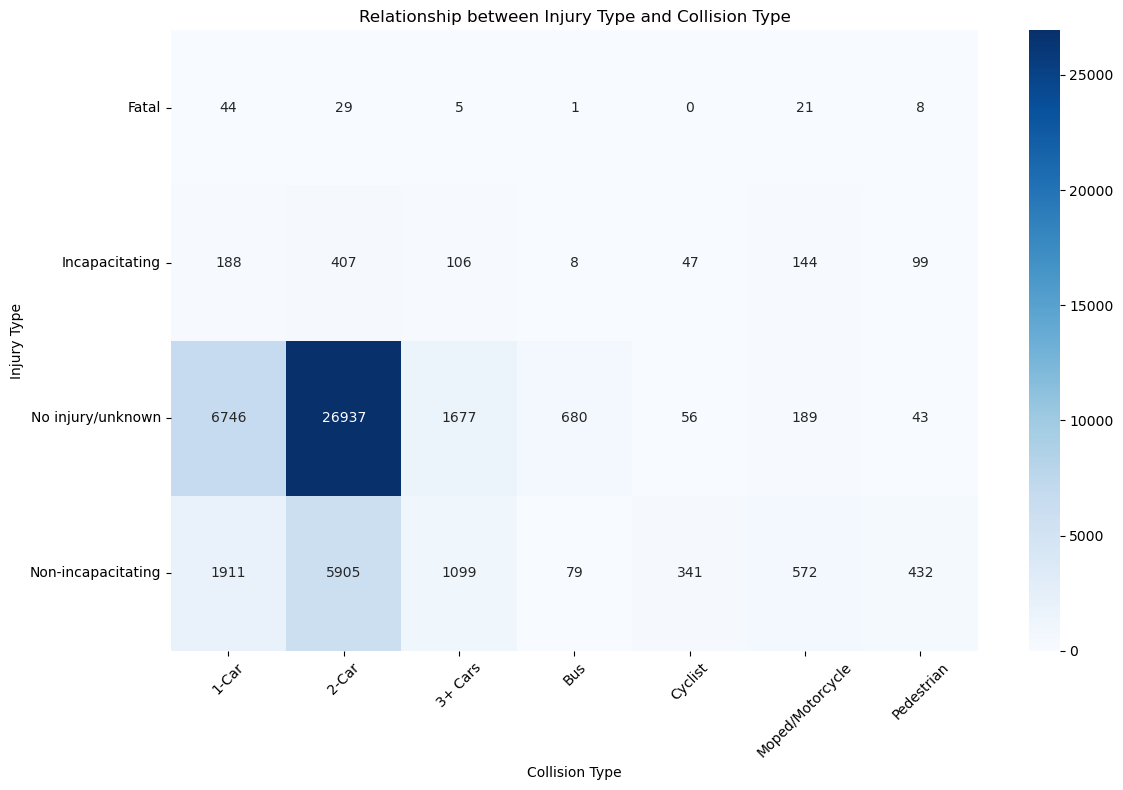

In [26]:
cross_tab = pd.crosstab(df['Injury Type'], df['Collision Type'])

plt.figure(figsize=(12, 8))
sns.heatmap(cross_tab, annot=True, cmap='Blues',fmt='d')
plt.xlabel('Collision Type')
plt.ylabel('Injury Type')
plt.title('Relationship between Injury Type and Collision Type')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

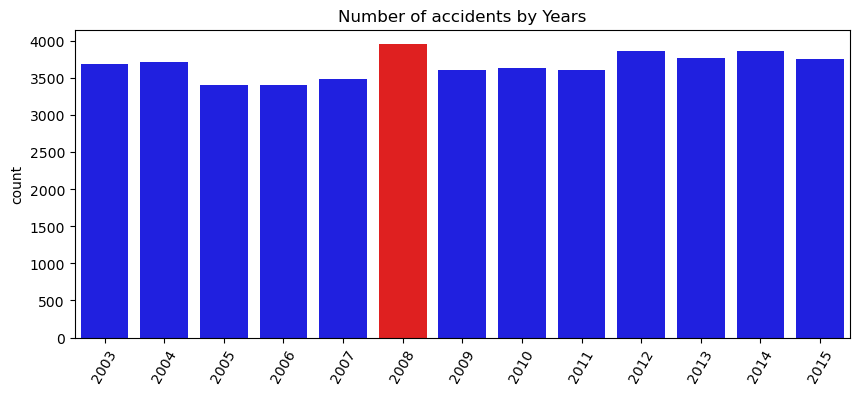

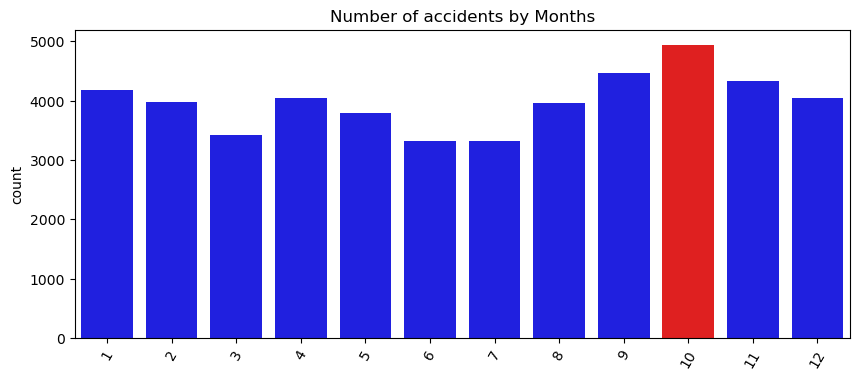

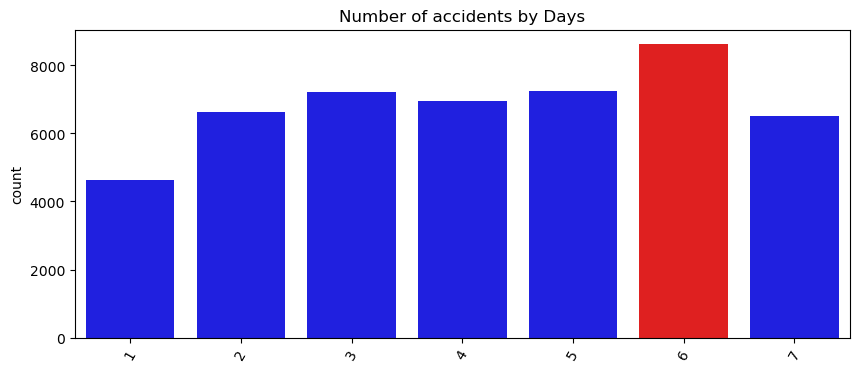

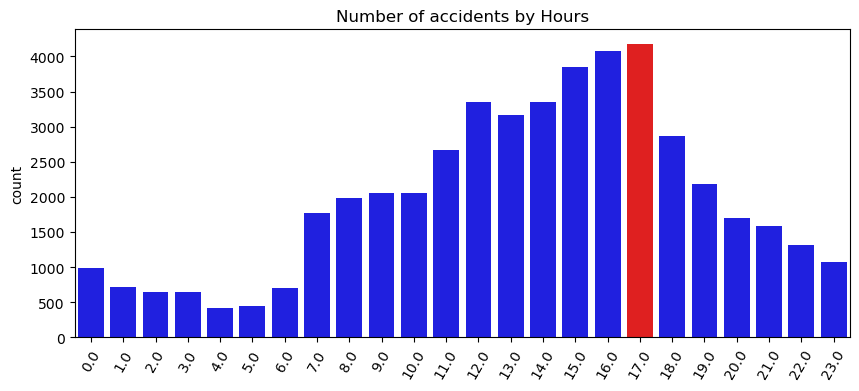

In [27]:
group_list = ["Year", "Month", "Day", "Hour"]

for i in group_list:
    grouped = df.groupby(i)[i].count().reset_index(name="count")
    
    plt.figure(figsize=(10,4))
    cols = ["blue" if (i < max(grouped["count"])) else "red" for i in grouped["count"]]
    sns.barplot(data=grouped, x= i, y="count", palette=cols)
    plt.title(f"Number of accidents by {i}s")
    plt.xticks(rotation=60)
    plt.xlabel("")
    plt.show()

In [28]:
grouped_colision_factors = df.groupby(["Collision Type", "Primary Factor"]).size().reset_index(name="counts")
grouped_colision_factors.head()

Collision Type                    Primary Factor  counts
0          1-Car  ACCELERATOR FAILURE OR DEFECTIVE      22
1          1-Car               ALCOHOLIC BEVERAGES     356
2          1-Car          ANIMAL/OBJECT IN ROADWAY    1378
3          1-Car        BRAKE FAILURE OR DEFECTIVE      87
4          1-Car                  CELL PHONE USAGE      37

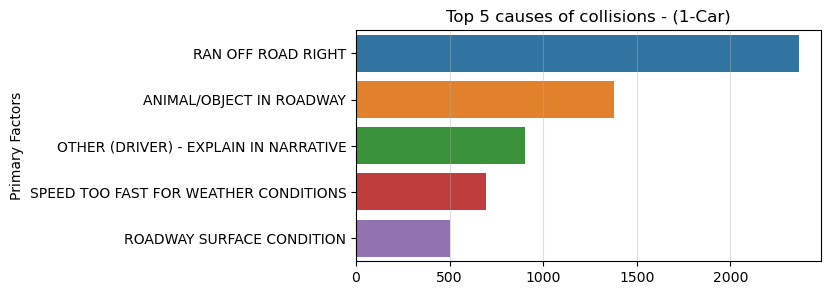

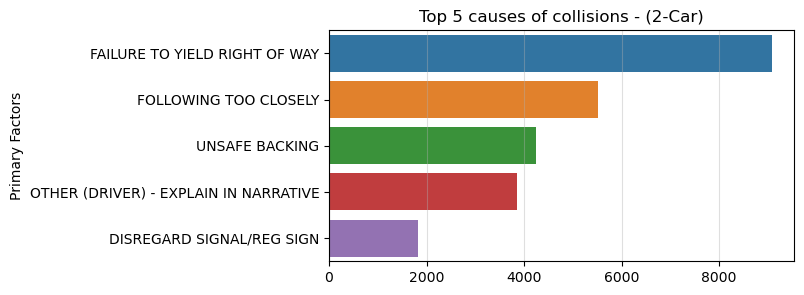

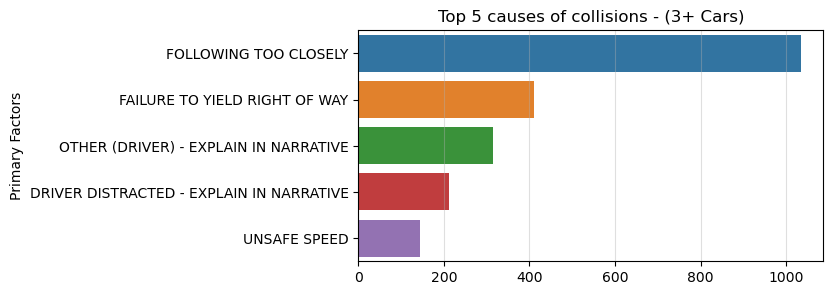

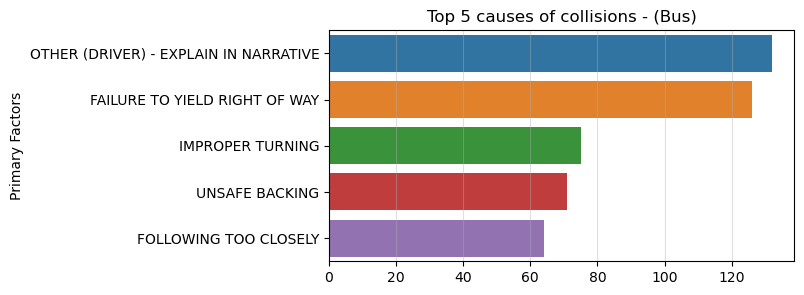

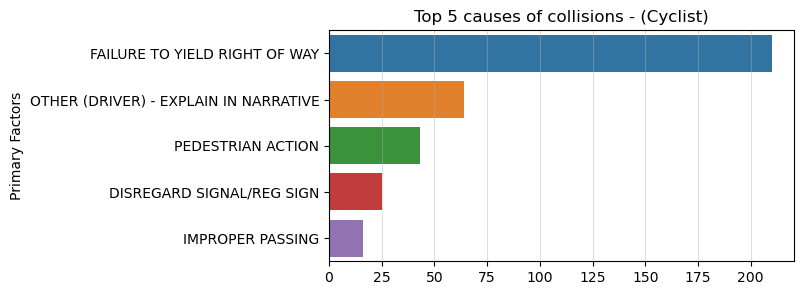

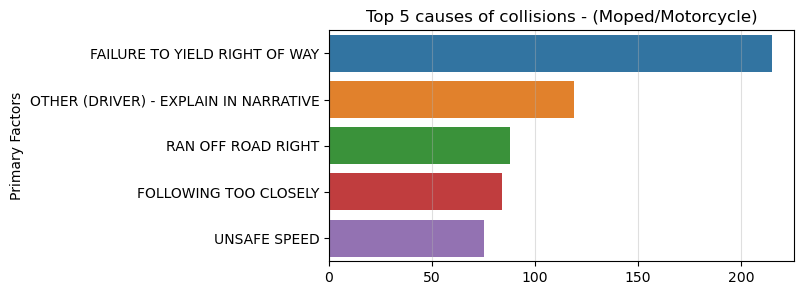

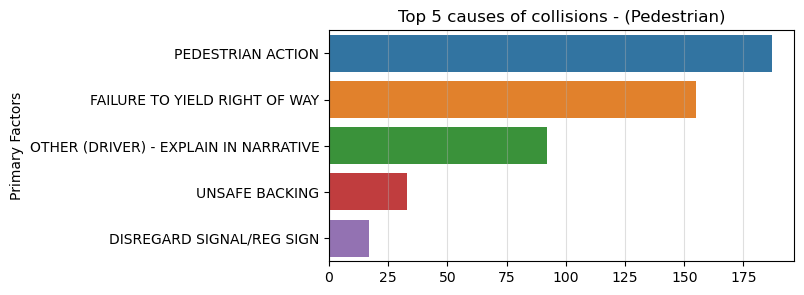

In [29]:
for i in grouped_colision_factors["Collision Type"].unique():
    grouped_collision = grouped_colision_factors[grouped_colision_factors["Collision Type"] == i]
    grouped_collision = grouped_collision.sort_values(by="counts", ascending=False).head(5)
    
    plt.figure(figsize=(6,3))
    sns.barplot(data=grouped_collision, x="counts", y="Primary Factor")
    plt.ylabel("Primary Factors"), plt.xlabel(""), plt.grid(axis="x", alpha=0.4)
    plt.title(f"Top 5 causes of collisions - ({i})") 
    plt.show()

#### Exploratory Data Analysis

In [30]:
#Check for correlation amongst the numeric values
car_corr = df.corr(numeric_only = True)
car_corr

Year     Month       Day      Hour  Latitude  Longitude
Year       1.000000 -0.011942 -0.004981 -0.018637 -0.019386   0.019000
Month     -0.011942  1.000000 -0.008367  0.010967  0.004523  -0.002613
Day       -0.004981 -0.008367  1.000000  0.008010 -0.004207   0.002130
Hour      -0.018637  0.010967  0.008010  1.000000  0.004280  -0.003762
Latitude  -0.019386  0.004523 -0.004207  0.004280  1.000000  -0.898754
Longitude  0.019000 -0.002613  0.002130 -0.003762 -0.898754   1.000000

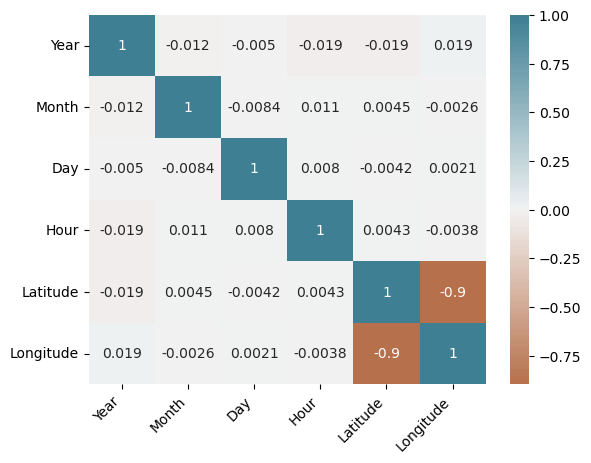

In [31]:
#Plot correlation matrix
ax = sns.heatmap(
 car_corr, annot=True,
    center=0,
    cmap=sns.diverging_palette(30, 220, n=200)
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
plt.show()

In [32]:
def factor_mapping(factor):
    if factor in ["ACCELERATOR FAILURE OR DEFECTIVE", "BRAKE FAILURE OR DEFECTIVE", "ENGINE FAILURE OR DEFECTIVE",'INSECURE/LEAKY LOAD' ,'OVERSIZE/OVERWEIGHT LOAD' ,'SHOULDER DEFECTIVE',"TIRE FAILURE OR DEFECTIVE","TOW HITCH FAILURE"  ]:
        return 'Car Factor'
    if factor in ['ALCOHOLIC BEVERAGES','DISREGARD SIGNAL/REG ',"DRIVER ASLEEP OR FATIGUED",'DRIVER DISTRACTED - EXPLAIN IN NARRATIVE','DRIVER ILLNESS', "FAILURE TO YIELD RIGHT OF WAY","FOLLOWING TOO CLOSELY","GLARE","ILLEGAL DRUGS",'IMPROPER LANE USAGE',"IMPROPER TURNING","JACKKNIFING","LEFT OF CENTER","OVERCORRECTING/OVERSTEERING","PASSENGER DISTRACTION","PRESCRIPTION DRUGS","RAN OFF ROAD LEFT","RAN OFF ROAD Right","SPEED TOO FAST FOR WEATHER CONDITIONS","STEERING FAILURE",'UNSAFE SPEED','VIOLATION OF LICENSE RESTRICTION','WRONG WAY ON ONE WAY']:
        return 'Human Factor'
    if factor in ['HEADLIGHT DEFECTIVE OR NOT ON']:
        return 'Human and Car Factor'
    if  factor in ['ANIMAL/OBJECT IN ROADWAY',"HOLES/RUTS IN SURFACE","IMPROPER PASSING","LANE MARKING OBSCURED","OBSTRUCTION NOT MARKED","PEDESTRIAN ACTION","ROAD UNDER CONSTRUCTION",'ROADWAY SURFACE CONDITION',"SEVERE CROSSWINDS","TRAFFIC CONTROL INOPERATIVE/MISSING/OBSC",'UNSAFE BACKING',"UNSAFE LANE MOVEMENT",'UTILITY WORK','VIEW OBSTRUCTED']:
        return "External Factor"

In [33]:
df["Primary Factor"]=df["Primary Factor"].map(factor_mapping)

### Train/Test Split

With your data prepared, split it into a train and test set.

In [34]:
df['is_injured'] = (df['Injury Type'] != 'No injury/unknown')

In [35]:
df.head()

Year  Month  Day Weekend?  Hour Collision Type         Injury Type  \
0  2015      1    5  Weekday   0.0          2-Car   No injury/unknown   
1  2015      1    6  Weekday  15.0          2-Car   No injury/unknown   
2  2015      1    6  Weekend  23.0          2-Car  Non-incapacitating   
3  2015      1    7  Weekend   9.0          2-Car  Non-incapacitating   
4  2015      1    7  Weekend  11.0          2-Car   No injury/unknown   

  Primary Factor      Reported_Location   Latitude  Longitude  is_injured  
0           None             1ST & FESS  39.159207 -86.525874       False  
1   Human Factor          2ND & COLLEGE  39.161440 -86.534848       False  
2           None  BASSWOOD & BLOOMFIELD  39.149780 -86.568890        True  
3   Human Factor         GATES & JACOBS  39.165655 -86.575956        True  
4   Human Factor                  W 3RD  39.164848 -86.579625       False

In [36]:
#perform label encoding on the categorical attributes to assign numeric mapping 
from sklearn.preprocessing import LabelEncoder

df[['Weekend?', 'Collision Type', 'Injury Type', 'is_injured','Primary Factor']] = df[['Weekend?', 'Collision Type', 'Injury Type', 'is_injured','Primary Factor']].apply(LabelEncoder().fit_transform)

In [37]:
X = df.drop(['is_injured','Reported_Location'], axis=1)
y = df.is_injured

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify = y)

In [39]:
y_test.value_counts(normalize = True)

0    0.76043
1    0.23957
Name: is_injured, dtype: float64

In [40]:
y_train.value_counts(normalize = True)

0    0.760435
1    0.239565
Name: is_injured, dtype: float64

### A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [41]:
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error,  r2_score
from sklearn.model_selection import KFold
import numpy as np
from sklearn.metrics import accuracy_score, recall_score, precision_score

In [42]:
model = LinearRegression().fit(X_train,y_train)

In [43]:
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

In [44]:
selector_train_mse = mean_squared_error(y_train, train_preds)
selector_test_mse = mean_squared_error(y_test, test_preds)

print(f'Train MSE: {selector_train_mse}')
print(f'Test MSE: {selector_test_mse}')
print("RMSE score: {}".format(np.sqrt(mean_squared_error(test_preds, y_test))))
print("Training set Accuracy:",round(model.score(X_train,y_train),4)*100)
print("Testing set Accuracy:",round(model.score(X_test,y_test),4)*100)

Train MSE: 0.07604046120579872
Test MSE: 0.07711148914370707
RMSE score: 0.27768955533780354
Training set Accuracy: 58.26
Testing set Accuracy: 57.67


###  A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
LR = LogisticRegression()
LR.fit(X_train, y_train)

LogisticRegression()

In [47]:
preds = LR.predict(X_test)

print(accuracy_score(y_test, preds))

0.9738384261197154


### Model Comparisons

In [48]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
import time 

In [49]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('SVC', SVC()))
models.append(( 'ada_baseline' , AdaBoostClassifier())),
models.append(('rf_baseline' , RandomForestClassifier()))

In [50]:
results_c = []
names_c = []

for name, model in models:
    # define how to split off validation data ('kfold' how many folds)
    kfold = KFold(n_splits=10)    
    # train the model
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')    
    results_c.append(cv_results)
    names_c.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.972880 (0.003102)
KNN: 0.875135 (0.005364)
DTC: 1.000000 (0.000000)
SVC: 0.760436 (0.009276)
ada_baseline: 1.000000 (0.000000)
rf_baseline: 1.000000 (0.000000)


In [51]:
start = time.time()
lr =LogisticRegression().fit(X_train, y_train)
lr_train = lr.score(X_train, y_train)
lr_test = lr.score(X_test, y_test)

end = time.time()

print("LR Train Time :",'%.4f' % (end - start))
print("LR Train Accuracy :",'%.4f' % lr_train)
print("LR Test Accuracy :",'%.4f' % lr_test)

LR Train Time : 0.5214
LR Train Accuracy : 0.9729
LR Test Accuracy : 0.9738


In [52]:
start = time.time()
knn = KNeighborsClassifier().fit(X_train, y_train)
knn_train = knn.score(X_train, y_train)
knn_test = knn.score(X_test, y_test)

end = time.time()

print("KNN Train Time :",'%.4f' % (end - start))
print("KNN Train Accuracy :",'%.4f' %knn_train)
print("KNN Test Accuracy :",'%.4f' % knn_test)

KNN Train Time : 15.5571
KNN Train Accuracy : 0.9184
KNN Test Accuracy : 0.8760


In [53]:
start = time.time()

svc = SVC().fit(X_train, y_train)
svc_train = svc.score(X_train, y_train)
svc_test = svc.score(X_test, y_test)

end = time.time()

print("SVC Train Time :",'%.4f' % (end - start))

print("SVC Train Accuracy :",'%.4f' % svc_train)
print("SVC Test Accuracy :",'%.4f' % svc_test)

SVC Train Time : 239.4899
SVC Train Accuracy : 0.7604
SVC Test Accuracy : 0.7604


In [54]:
start = time.time()

dtree = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)
depth_1 = dtree.get_depth()
train_acc = dtree.score(X_train, y_train)
test_acc = dtree.score(X_test, y_test)

end = time.time()

print("DTC Train Time :",'%.4f' % (end - start))

print("DTC Train Accuracy :",'%.4f' % train_acc)
print("DTC Test Accuracy :",'%.4f' % test_acc)
print(f'Depth of tree: {depth_1}')

DTC Train Time : 0.0972
DTC Train Accuracy : 1.0000
DTC Test Accuracy : 1.0000
Depth of tree: 2


In [55]:
start = time.time()

abc = AdaBoostClassifier(random_state=42).fit(X_train, y_train)
abc_train = abc.score(X_train, y_train)
abc_test = abc.score(X_test, y_test)

end = time.time()

print("ABC Train Time :",'%.4f' % (end - start))

print("ABC Train Accuracy :",'%.4f' % abc_train)
print("ABC Test Accuracy :",'%.4f' % abc_test)

ABC Train Time : 3.3188
ABC Train Accuracy : 1.0000
ABC Test Accuracy : 1.0000


In [56]:
start = time.time()

rtc = RandomForestClassifier(random_state=42).fit(X_train, y_train)
rtc_train = rtc.score(X_train, y_train)
rtc_test = rtc.score(X_test, y_test)

end = time.time()

print("RTC Train Time :",'%.4f' % (end - start))

print("RTC Train Accuracy :",'%.4f' % rtc_train)
print("RTC Test Accuracy :",'%.4f' % rtc_test)

RTC Train Time : 5.9555
RTC Train Accuracy : 1.0000
RTC Test Accuracy : 1.0000


In [57]:
results= {'Model': ['Logistic Regression','KNN','Decision Tree','SVC', 'AdaBoost', 'RandomForest'],
           'Train time': [0.5074, 10.0311, 0.0959,163.0581,3.7512,4.1232],
           'Train Accuracy': [ 0.9729,0.9184,1,0.7604, 1,1],
           'Test Accuracy': [0.9738,0.8760,1,0.7604,1,1]}        

results_df = pd.DataFrame(results).set_index('Model')

### ANSWER CHECK
print(type(results_df))
print(results_df)

<class 'pandas.core.frame.DataFrame'>
                     Train time  Train Accuracy  Test Accuracy
Model                                                         
Logistic Regression      0.5074          0.9729         0.9738
KNN                     10.0311          0.9184         0.8760
Decision Tree            0.0959          1.0000         1.0000
SVC                    163.0581          0.7604         0.7604
AdaBoost                 3.7512          1.0000         1.0000
RandomForest             4.1232          1.0000         1.0000


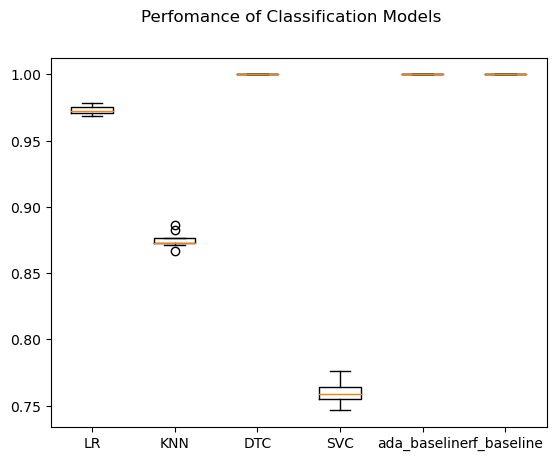

In [58]:
fig = plt.figure()
fig.suptitle('Perfomance of Classification Models')
ax = fig.add_subplot(111)
plt.boxplot(results_c)
ax.set_xticklabels(names_c)
plt.show()

#### Observations - 
Logistic regression is the best performing model amongst all of the other classification algorithms with an accuracy of ~97% , suggesting a high level of strength of this model.

Detailed classification report
------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     10900
           1       0.99      0.90      0.94      3434

    accuracy                           0.97     14334
   macro avg       0.98      0.95      0.96     14334
weighted avg       0.97      0.97      0.97     14334



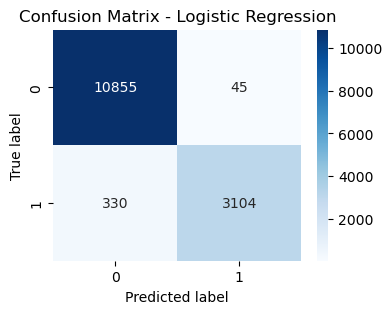

In [59]:
# Confusion Matrix 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import pylab as pl

plt.figure(figsize=(4,3))
CMatrix = confusion_matrix(y_test, preds)
sns.heatmap(CMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['0', '1'], 
            yticklabels = ['0', '1'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Logistic Regression");
print("Detailed classification report")
print("------------------------------------------------------")
print(classification_report(y_test, preds))

#### Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [60]:
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline

In [61]:
def result(y_test, y_pred):
    r=[]
    r.append('%.4f' % accuracy_score(y_test,y_pred))
    r.append('%.4f' % precision_score(y_test, y_pred))
    r.append('%.4f' % recall_score(y_test, y_pred))
     
    return (r)

score_data = pd.DataFrame(index=['Accuracy Score','Precision Score', 'Recall Score'])

In [62]:

extractor = SelectFromModel(LogisticRegression(penalty='l1', solver = 'liblinear', random_state = 42))

In [63]:
LR_pipe = Pipeline([('selector', extractor),
                    ('lgr', LogisticRegression(random_state=42, max_iter = 1000))])
LR_pipe.fit(X_train, y_train)

LR_train = LR_pipe.score(X_train, y_train)
LR_test = LR_pipe.score(X_test, y_test)

train_preds = LR_pipe.predict(X_train)
y_pred = LR_pipe.predict(X_test)

# #Append performance of model to the dataframe
score_lr = result(y_test, y_pred)
score_data['Logisctic Regression'] = score_lr
print('Accuracy Score: ', score_lr[0])
print('Precision Score: ', score_lr[1])
print('Recall Score: ', score_lr[2])

print("LR Train Accuracy :",'%.4f' % LR_train)
print("LR Test Accuracy :",'%.4f' % LR_test)

Accuracy Score:  0.9738
Precision Score:  0.9857
Recall Score:  0.9039
LR Train Accuracy : 0.9729
LR Test Accuracy : 0.9738


In [64]:
knn_pipe = Pipeline([('scale', StandardScaler()), ('knn', KNeighborsClassifier(n_neighbors = 10))])
knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('scale', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=10))])

In [65]:
knn_grid = GridSearchCV(knn_pipe, param_grid = {'knn__n_neighbors': range(1, 23, 2)},
                   scoring = 'accuracy')
knn_grid.fit(X_train, y_train)

knn_train = knn_grid.score(X_train, y_train)
knn_test = knn_grid.score(X_test, y_test)

train_preds = knn_grid.predict(X_train)
y_pred = knn_grid.predict(X_test)

# #Append performance of model to the dataframe
score_knn = result(y_test, y_pred)
score_data['KNN'] = score_knn
print('Accuracy Score: ', score_knn[0])
print('Precision Score: ', score_knn[1])
print('Recall Score: ', score_knn[2])

print("KNN Train Accuracy :",'%.4f' %knn_train)
print("KNN Test Accuracy :",'%.4f' % knn_test)

Accuracy Score:  0.9999
Precision Score:  1.0000
Recall Score:  0.9997
KNN Train Accuracy : 1.0000
KNN Test Accuracy : 0.9999


In [69]:
params = {'min_impurity_decrease': [0.01, 0.02, 0.03, 0.05],
         'max_depth': [1, 2, 4, 5, 10],
         'min_samples_split': [0.1, 0.2, 0.05],
         'criterion': ['entropy', 'gini']}

grid = GridSearchCV(DecisionTreeClassifier(random_state = 42), param_grid=params).fit(X_train, y_train)
train_acc = grid.score(X_train, y_train)
test_acc = grid.score(X_test, y_test)
best_params = grid.best_params_

train_preds = grid.predict(X_train)
y_pred = grid.predict(X_test)

# #Append performance of model to the dataframe
score_DTC = result(y_test, y_pred)
score_data['Decision Tree'] = score_DTC
print('Accuracy Score: ', score_DTC[0])
print('Precision Score: ', score_DTC[1])
print('Recall Score: ', score_DTC[2])



print("DTC Train Accuracy :",'%.4f' % train_acc)
print("DTC Test Accuracy :",'%.4f' % test_acc)
print(f'Best Parameters: {best_params}')

Accuracy Score:  1.0000
Precision Score:  1.0000
Recall Score:  1.0000
DTC Train Accuracy : 1.0000
DTC Test Accuracy : 1.0000
Best Parameters: {'criterion': 'entropy', 'max_depth': 2, 'min_impurity_decrease': 0.01, 'min_samples_split': 0.1}


In [67]:
#params =  {'C': [10, 15, 25], 
#             'gamma': [0.005, 0.01, 0.05],
#             'kernel': ['linear','poly', 'rbf'], 
#             'degree': [3,4, 5],
#             'coef0': [1],
#             'class_weight': [None, 'balanced'],
#            }

start = time.time()

#svc = GridSearchCV(SVC(), param_grid = params, cv = 5)

svc = SVC(kernel = 'poly', degree = 4 , class_weight = 'balanced').fit(X_train, y_train)
#svc.fit(X_train, y_train)

svc_train = svc.score(X_train, y_train)
svc_test = svc.score(X_test, y_test)
#best_params = svc.best_params_

train_preds = svc.predict(X_train)
y_pred = svc.predict(X_test)


end = time.time()

print("DTC Train Time :",'%.4f' % (end - start))

score_svc = result(y_test, y_pred)
score_data['SVC'] = score_svc
print('Accuracy Score: ', score_svc[0])
print('Precision Score: ', score_svc[1])
print('Recall Score: ', score_svc[2])
#print(f'Best Parameters: {best_params}')

print("SVC Train Accuracy :",'%.4f' % svc_train)
print("SVC Test Accuracy :",'%.4f' % svc_test)

DTC Train Time : 255.2183
Accuracy Score:  0.7604
Precision Score:  0.0000
Recall Score:  0.0000
SVC Train Accuracy : 0.7605
SVC Test Accuracy : 0.7604


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [68]:
score_data

Logisctic Regression     KNN Decision Tree     SVC
Accuracy Score                0.9738  0.9999        1.0000  0.7604
Precision Score               0.9857  1.0000        1.0000  0.0000
Recall Score                  0.9039  0.9997        1.0000  0.0000

### Deployment

### Recommendations

1. Inclusion of additional variables - expanding into driver demographics

The focus of the modeling has been on bank client information. I would liketo expand the analsyis by including features such as weather, age of driver, streaming api data,  vehicle type, traffic signal etc to look for any strong correlation on the primary factor and Injury type. By gathering more data, there could be other striking correlations found to provide evidence on nature of accidents subject to those specific parameters. 


2. Reference other data sources

Further analysis of the data with a broader set could be very beneficial i.e., getting additional source data on such as US accidents, road traffic accidents, road incidents that has a broader span of data could provide additional insights into the trends and major causes for accidents as they could inlcude additional parameters. 